In [34]:
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
import sklearn.metrics as metrics
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls ../analysis/PBMC68k/

block_zifa_clusters.csv       pca_clusters.csv	       simlr.csv
block_zifa.csv		      pca.csv		       tsne_clusters.csv
factor_analysis_clusters.csv  phenograph_clusters.csv  tsne.csv
factor_analysis.csv	      simlr_clusters.csv


In [3]:
cluster_results_path = []
dim_red_results_path = []
for name in glob.glob('../analysis/PBMC68k/*.csv'):
    if '_clusters' in name:
        cluster_results_path.append(name)
    else:
        dim_red_results_path.append(name)

In [4]:
! head ../data/pbmc68k/PBMC68k.cellLables.txt

CD8+ Cytotoxic T
CD8+/CD45RA+ Naive Cytotoxic
CD4+/CD25 T Reg
CD19+ B
CD4+/CD25 T Reg
CD4+/CD25 T Reg
CD4+/CD45RO+ Memory
CD8+ Cytotoxic T
CD8+/CD45RA+ Naive Cytotoxic
CD8+ Cytotoxic T


In [5]:
cluster_labels_path = '../data/pbmc68k/PBMC68k.cellLables.txt'

In [6]:
cell_groups = np.genfromtxt(cluster_labels_path, dtype='str', delimiter='/n')

In [7]:
dim_results = []
for d in dim_red_results_path:
    dim_results.append(np.genfromtxt(d, delimiter=','))
cluster_results = []
for c in cluster_results_path:
    cluster_results.append(np.genfromtxt(c, delimiter=',', dtype=np.int64))   

In [8]:
cluster_results[0].shape

(68579,)

In [9]:
dim_results[0].shape

(68579, 2)

In [10]:
dim_red_results_path[2].split('/')[3].split('.')[0]

'simlr'

In [11]:
cell_groups.shape

(68579,)

In [30]:
keys = ['pca','fa','simlr','tsne','zifa','pg']

In [38]:
i = 0
res_dict = dict()
for cr in cluster_results:
    res_dict[keys[i]] = normalized_mutual_info_score(cell_groups, cr)
    i = i + 1

In [39]:
res_dict

{'fa': 0.36751651044931993,
 'pca': 0.47386207422627125,
 'pg': 0.5615924944309132,
 'simlr': 0.496238999975089,
 'tsne': 0.48361836135991243,
 'zifa': 0.43865936211664697}

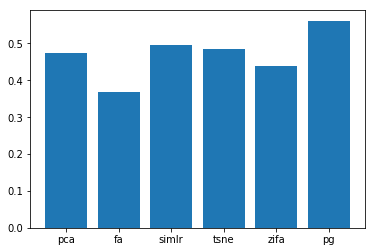

In [40]:
plt.bar(range(len(res_dict)), list(res_dict.values()), align='center')
plt.xticks(range(len(res_dict)), list(res_dict.keys()))

plt.show()